In [1]:
import os
import src
import torch
import requests
import numpy as np
import torchvision
from PIL import Image, ImageDraw
from torch.utils.data import DataLoader
from transformers import DetrImageProcessor
from transformers import AutoImageProcessor, DetrForObjectDetection

In [2]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [3]:
train_dataset = torchvision.datasets.CocoDetection("AquariumDetection/train",
                                                   "AquariumDetection/train/_annotations.coco.json")
data = train_dataset[0]
data

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


(<PIL.Image.Image image mode=RGB size=768x1024>,
 [{'id': 0,
   'image_id': 0,
   'category_id': 2,
   'bbox': [0, 752, 176, 243],
   'area': 42768,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 1,
   'image_id': 0,
   'category_id': 2,
   'bbox': [126, 738, 431, 184],
   'area': 79304,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 2,
   'image_id': 0,
   'category_id': 2,
   'bbox': [10, 845, 202, 133],
   'area': 26866,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 3,
   'image_id': 0,
   'category_id': 2,
   'bbox': [490, 486, 208, 123],
   'area': 25584,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 4,
   'image_id': 0,
   'category_id': 2,
   'bbox': [665, 265, 102, 55],
   'area': 5610,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 5,
   'image_id': 0,
   'category_id': 2,
   'bbox': [541, 933, 226, 90],
   'area': 20340,
   'segmentation': [],
   'iscrowd': 0}])

In [4]:
target = {"image_id": data[1][0]["image_id"], "annotations": data[1]}
encoding = processor(images=data[0], annotations=target, return_tensors="pt")
encoding.keys()

dict_keys(['pixel_values', 'pixel_mask', 'labels'])

In [5]:
encoding["pixel_values"].shape

torch.Size([1, 3, 1066, 800])

In [6]:
encoding["labels"]

[{'size': tensor([1066,  800]), 'image_id': tensor([0]), 'class_labels': tensor([2, 2, 2, 2, 2, 2]), 'boxes': tensor([[0.1146, 0.8530, 0.2292, 0.2373],
         [0.4447, 0.8105, 0.5612, 0.1797],
         [0.1445, 0.8901, 0.2630, 0.1299],
         [0.7734, 0.5347, 0.2708, 0.1201],
         [0.9323, 0.2856, 0.1328, 0.0537],
         [0.8516, 0.9551, 0.2943, 0.0879]]), 'area': tensor([46377.2461, 85996.5625, 29133.2559, 27743.0645,  6083.4351, 22056.5176]), 'iscrowd': tensor([0, 0, 0, 0, 0, 0]), 'orig_size': tensor([1024,  768])}]

In [7]:
# Custom Dataset (Format annotation for DETR, Resize+Normalize Img)
train_dataset = src.CocoDetection(img_folder="AquariumDetection/train",
                                  ann_file="AquariumDetection/train/_annotations.coco.json")

val_dataset = src.CocoDetection(img_folder="AquariumDetection/valid",
                                ann_file="AquariumDetection/valid/_annotations.coco.json")

print("N train:", len(train_dataset))
print("N validation:", len(val_dataset))

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
N train: 448
N validation: 127


In [8]:
train_dataloader = DataLoader(train_dataset,  batch_size=6, shuffle=True, collate_fn=train_dataset.collate_fn)
batch = next(iter(train_dataloader))
batch.keys()

dict_keys(['pixel_values', 'pixel_mask', 'labels'])

In [9]:
batch["pixel_values"].shape

torch.Size([6, 3, 1333, 1333])

In [10]:
batch["pixel_mask"].shape

torch.Size([6, 1333, 1333])

In [11]:
len(batch["labels"])

6

In [12]:
batch["labels"][0]

{'size': tensor([1333,  750]), 'image_id': tensor([236]), 'class_labels': tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'boxes': tensor([[0.5564, 0.8760, 0.1892, 0.1133],
        [0.5911, 0.3462, 0.1441, 0.0850],
        [0.7057, 0.9453, 0.1406, 0.0703],
        [0.8411, 0.3291, 0.1094, 0.0684],
        [0.0833, 0.4961, 0.0938, 0.0566],
        [0.6293, 0.2529, 0.1024, 0.0508],
        [0.6997, 0.4673, 0.0972, 0.0479],
        [0.3568, 0.8193, 0.0781, 0.0469],
        [0.0234, 0.6587, 0.0469, 0.0459],
        [0.4401, 0.6338, 0.0642, 0.0410],
        [0.4740, 0.0732, 0.0868, 0.0391],
        [0.0417, 0.5664, 0.0729, 0.0312],
        [0.4115, 0.1992, 0.0590, 0.0312],
        [0.0408, 0.6016, 0.0642, 0.0273],
        [0.1684, 0.8188, 0.0417, 0.0186],
        [0.1033, 0.6719, 0.0469, 0.0176],
        [0.5964, 0.4170, 0.0573, 0.0176],
        [0.4922, 0.7251, 0.0330, 0.0166]]), 'area': tensor([21431.5449, 12239.5752,  9885.2236,  7474.9375,  5308.7314,  5200.2515,
       

In [13]:
train_dataloader.dataset.coco.getImgIds()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
train_dataloader.dataset.coco.cats

{0: {'id': 0, 'name': 'creatures', 'supercategory': 'none'},
 1: {'id': 1, 'name': 'fish', 'supercategory': 'creatures'},
 2: {'id': 2, 'name': 'jellyfish', 'supercategory': 'creatures'},
 3: {'id': 3, 'name': 'penguin', 'supercategory': 'creatures'},
 4: {'id': 4, 'name': 'puffin', 'supercategory': 'creatures'},
 5: {'id': 5, 'name': 'shark', 'supercategory': 'creatures'},
 6: {'id': 6, 'name': 'starfish', 'supercategory': 'creatures'},
 7: {'id': 7, 'name': 'stingray', 'supercategory': 'creatures'}}

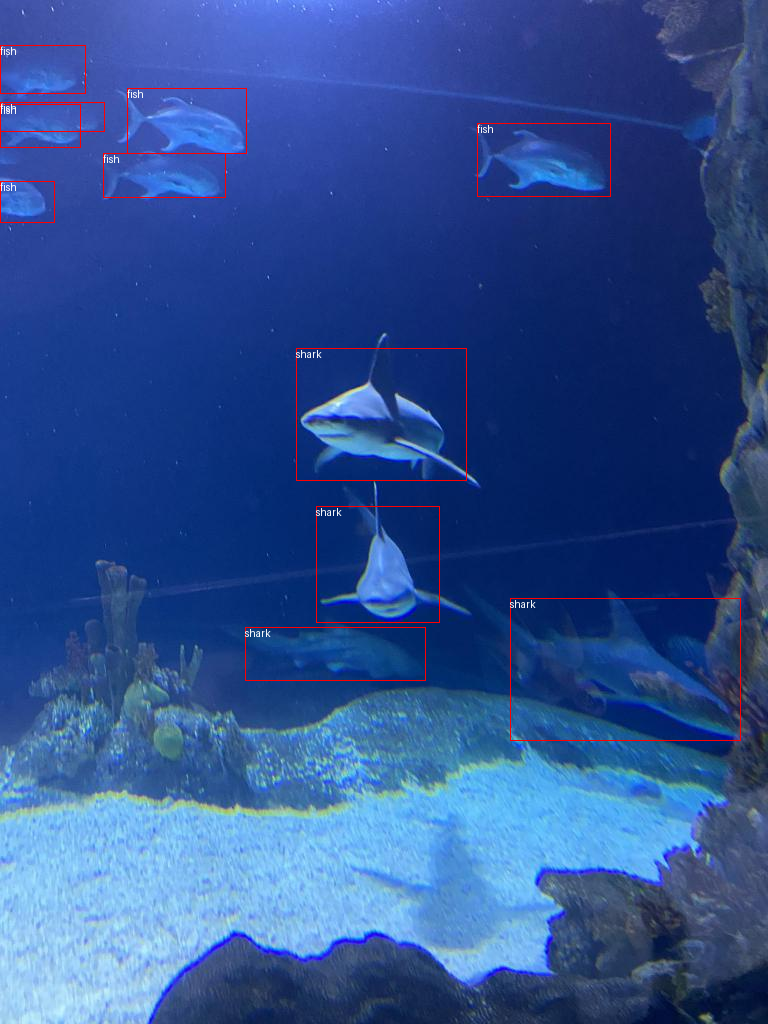

In [15]:
image_ids = train_dataset.coco.getImgIds()
image_id = image_ids[np.random.randint(0, len(image_ids))]

image = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join('AquariumDetection/train', image['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image, "RGBA")

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}

for annotation in annotations:
  box = annotation['bbox']
  class_idx = annotation['category_id']
  x,y,w,h = tuple(box)
  draw.rectangle((x,y,x+w,y+h), outline='red', width=1)
  draw.text((x, y), id2label[class_idx], fill='white')

image

In [16]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}")

print(1)


KeyboardInterrupt

